In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import ListedColormap, Normalize
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

from common import *

In [2]:
def save_fig(fig, filename):
    filepath = './fig/' + filename
    fig.savefig(filepath, dpi=300, bbox_inches='tight')

In [3]:
lef = load_lef()
lms = load_lms()
xyz_cmf = load_xyz_cmf()
xyz_cc = load_xyz_cc()
rgb_cmf = load_rgb_cmf()
rgb_cc = load_rgb_cc()

In [4]:
def add_color_xaxis(ax, xmin, xmax):
    ax.set_xticks([])
    ax.set_xlim(xmin, xmax)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('bottom', size=0.3, pad=0)
    
    cmf = xyz_cmf.reindex(np.arange(xmin, xmax + 1, 1)).fillna(0)
    RGB = XYZ_to_sRGB(cmf)
    RGB = np.clip(RGB * 0.6, 0, 1)
    RGB = gamma_encoding(RGB)

    mappable = ScalarMappable(
        norm=Normalize(360, 800),
        cmap=ListedColormap(RGB)
    )
    cbar = plt.colorbar(mappable, cax=cax, orientation='horizontal')
    cbar.set_label('Wavelength (nm)', fontsize='large')

    return cbar

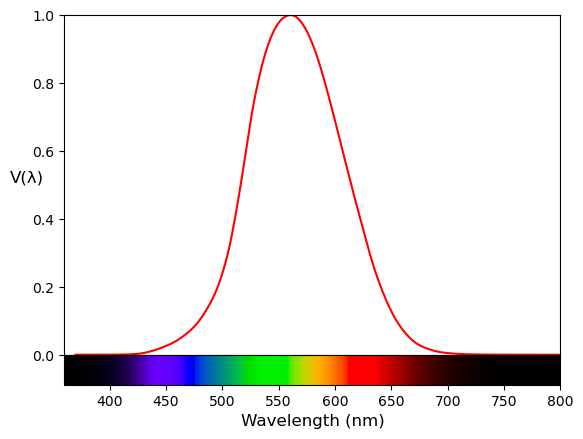

In [5]:
fig, ax = plt.subplots()
ax.plot(lef.index, lef, c='r', lw=1.5)
ax.set_ylim(0, 1)
ax.set_ylabel('V(λ)', fontsize='large', rotation=0)
add_color_xaxis(ax, xmin=350, xmax=800)
# save_fig(fig, 'lef.png')

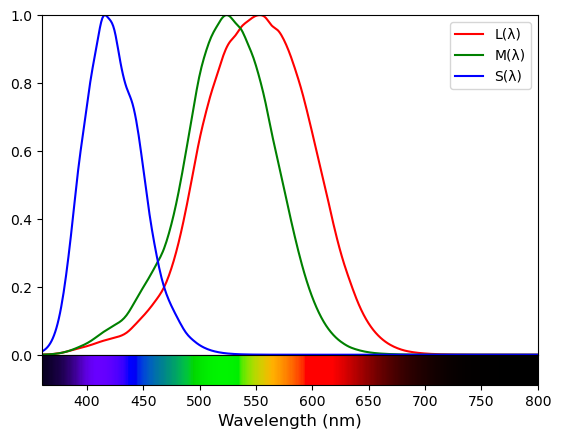

In [6]:
fig, ax = plt.subplots()
ax.plot(lms.index, lms['l'], c='r', label='L(λ)')
ax.plot(lms.index, lms['m'], c='g', label='M(λ)')
ax.plot(lms.index, lms['s'], c='b', label='S(λ)')
ax.legend()
ax.set_ylim(0, 1)
add_color_xaxis(ax, xmin=390, xmax=800)
# save_fig(fig, 'lms.png')

Text(0, 0.5, 'Luminance')

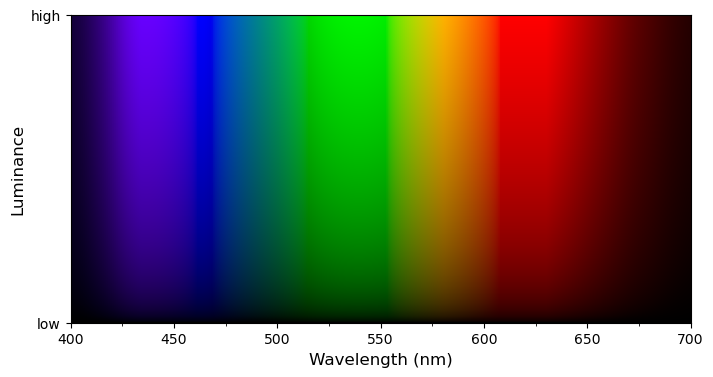

In [7]:
RGB = XYZ_to_sRGB(xyz_cmf)
RGB = np.clip(RGB * 0.6, 0, 1)
RGB = RGB * np.linspace(0, 1, 256)[:, np.newaxis, np.newaxis]
RGB = gamma_encoding(RGB)

fig, ax = plt.subplots(figsize=(8, 4))
ax.imshow(
    X=RGB,
    aspect='auto',
    origin='lower',
    extent=[xyz_cmf.index[0], xyz_cmf.index[-1], 0, 1]
)

ax.set_xlim(400, 700)
ax.set_ylim(0, 1)
ax.set_yticks([0, 1])
ax.set_yticklabels(['low', 'high'])
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.xaxis.set_minor_locator(MultipleLocator(25))
ax.set_xlabel('Wavelength (nm)', fontsize='large')
ax.set_ylabel('Luminance', fontsize='large')
# save_fig(fig, 'monochrome.png')

Text(0, 0.5, 'y')

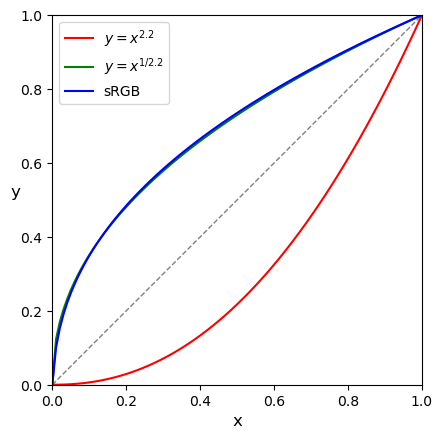

In [8]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

x = np.linspace(0, 1, 100)
y1 = x**2.2
y2 = x**(1 / 2.2)
y3 = gamma_encoding(x)

ax.plot(x, x, ls='--', lw=1, c='gray')
ax.plot(x, y1, c='r', label='$y=x^{2.2}$')
ax.plot(x, y2, c='g', label='$y=x^{1/2.2}$')
ax.plot(x, y3, c='b', label='sRGB')
ax.legend()

ax.set_xlabel('x', fontsize='large')
ax.set_ylabel('y', fontsize='large', rotation=0)
# save_fig(fig, 'gamma_curve.png')

Text(0.5, 1.0, 'With Gamma')

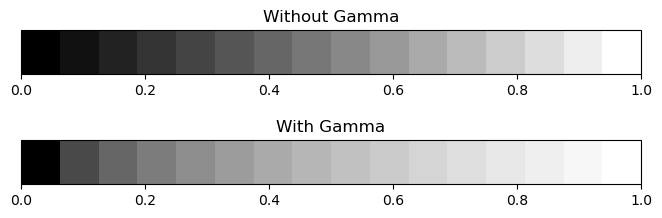

In [9]:
RGB1 = np.ones(3) * np.linspace(0, 1, 16)[:, np.newaxis]
RGB2 = gamma_encoding(RGB1)

mappable1 = ScalarMappable(cmap=ListedColormap(RGB1))
mappable2 = ScalarMappable(cmap=ListedColormap(RGB2))

fig, axes = plt.subplots(2, 1, figsize=(8, 2))
fig.subplots_adjust(hspace=1.5)
fig.colorbar(mappable1, cax=axes[0], orientation='horizontal')
fig.colorbar(mappable2, cax=axes[1], orientation='horizontal')
axes[0].set_title('Without Gamma')
axes[1].set_title('With Gamma')
# save_fig('gamma_grayscale.png')